### Normal Distribution

- Bell Curve/Gaussian Distribution
- Empirical Rule
  1. 68% - 1 standard deviation of the mean
  2. 95% - 2 standars deviations of the mean
  3. 99.7% - 3 standard deviations of the mean
 
- The mean, median and mode are exactly the same
- Symmetrical Left and Right

<div style = "text-align: center">
    <img src = "https://elentra.healthsci.queensu.ca/assets/modules/types-of-data/iq_bell_curve.gif", alt = "Normal-Dist" />
</div>


**Things to do:**

1. Histogram & KDE
2. Z Scores calculation
3. CDF to FIND Probabilities at a number or range
4. Qunatiles - Quartile, Decile, Percentile
   

In [7]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [18]:
# Example 1: Generating a Normal Distribution

# seting avriable for normal distribution
mean = 0
std = 1
size = 1000

# Generating the data
np.random.seed(41)
data = np.random.normal( loc = mean, scale = std, size = size)
mean_data = np.mean(data)
median_data = np.median(data)
mode = stats.mode(data)
std_data = np.std(data)



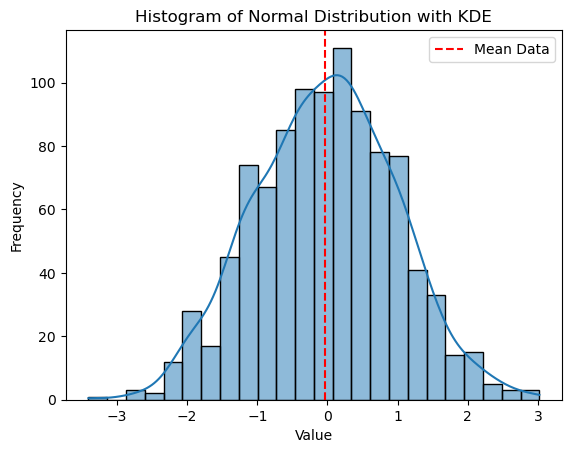

In [20]:
# Example 2: Visualize using Histogram

# Visualize the distribution
sns.histplot(data, kde = True)
plt.axvline(mean_data, color = "r", linestyle = "--", label = "Mean Data")
plt.title("Histogram of Normal Distribution with KDE")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Note from visualization: Identified some outliers < -3 & > 3

In [28]:
# Example 4: Z- Score

df = pd.DataFrame({"Values": data})

# Creating new column for Z-Score
df["Z-Score"] = (df["Values"] - df["Values"].mean()) / df["Values"].std()

# Creating range to group the z-score into its range

with_1_std = len(df[(df["Z-Score"] >= -1) & (df["Z-Score"] <= 1)]) / len(df) * 100
with_2_std = len(df[(df["Z-Score"] >= -2) & (df["Z-Score"] <= 2)]) / len(df) * 100
with_3_std = len(df[(df["Z-Score"] >= -3) & (df["Z-Score"] <= 3)]) / len(df) * 100

# Creating summary df

summary = pd.DataFrame({
    "Std Dev" : ["One", "Two", "Three"],
    "Percent" : [with_1_std, with_2_std, with_3_std]
})

summary 



,Std Dev,Percent
0,One,66.6
1,Two,95.8
2,Three,99.8


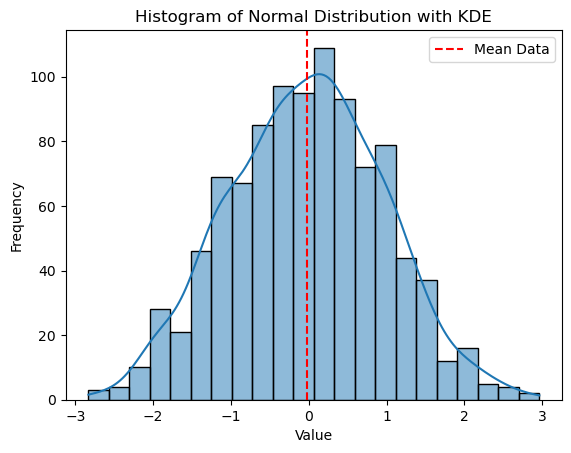

In [40]:
# Example 5: Handling outliers

df["Outliers"] = (df["Z-Score"] > 3) | (df["Z-Score"] < -3)

# Finding top lowest and highest to determine the outliers
top_10_highest = df.sort_values(by = "Z-Score", ascending = False).head(10)
top_10_lowest = df.sort_values(by = "Z-Score", ascending = True).head(10)

# Removing outliers
df_no_outliers = df[~df["Outliers"] == True]

# Rechecking the outliers
top_10_highest_no_outliers = df_no_outliers.sort_values(by = "Z-Score", ascending = False).head(10)
top_10_lowest_no_outliers = df_no_outliers.sort_values(by = "Z-Score", ascending = True).head(10)
# print(top_10_highest_no_outliers)
# print(top_10_lowest_no_outliers)


# Visualize the no outliers 

# Visualize the distribution
sns.histplot(data = df_no_outliers["Values"], kde = True)
plt.axvline(mean_data, color = "r", linestyle = "--", label = "Mean Data")
plt.title("Histogram of Normal Distribution with KDE")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [48]:
# Example 6: CDF Probabilities

cdf_neg2 = stats.norm.cdf(-2, loc = data.mean(), scale = data.std())
print(cdf_neg2)

cdf_zero = stats.norm.cdf(0, loc = data.mean(), scale = data.std())
print(cdf_zero)

cdf_2 = stats.norm.cdf(2, loc = data.mean(), scale = data.std())
print(cdf_2)

# CDF Probabilities of no outliers data

cdf_neg2_no_outliers = stats.norm.cdf(-2, loc = df["Values"].mean(), scale = df["Values"].std())
print(cdf_neg2_no_outliers)

cdf_zero_no_outliers = stats.norm.cdf(-2, loc = df["Values"].mean(), scale = df["Values"].std())
print(cdf_zero_no_outliers)

cdf_2_no_outliers = stats.norm.cdf(-2, loc = df["Values"].mean(), scale = df["Values"].std())
print(cdf_2_no_outliers)

0.02440036616180828
0.5112001698313089
0.9786424570335633
0.024456852200418287
0.024456852200418287
0.024456852200418287


In [53]:
# Example 7: Quantiles

# Quartiles
Q1 = np.percentile(data, 25)
print(Q1)

# Deciles
D9 = np.percentile(data, 90)
print(D9)

# Percentile 
p11 = np.percentile(data, 11)
print(p11)

-0.7177489187806477
1.210237039168975
-1.2583523772339904
